<a href="https://colab.research.google.com/github/EmilianoNicolasPrado/COVID19/blob/main/Nicolas_Prado_autoencoder_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

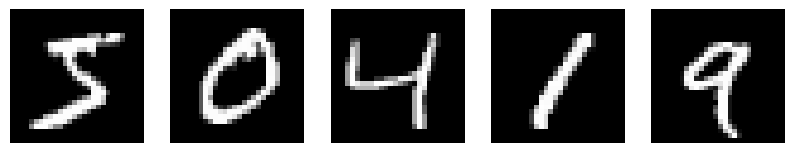

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape, BatchNormalization, LeakyReLU
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist

# Cargar el dataset MNIST
(x_train, _), (x_test, _) = mnist.load_data()

# Normalizar las imágenes
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Agregar una dimensión para el canal
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# Visualizar algunas imágenes
fig, axes = plt.subplots(1, 5, figsize=(10, 2))
for i in range(5):
    axes[i].imshow(x_train[i].squeeze(), cmap='gray')
    axes[i].axis('off')
plt.show()

In [ ]:

# Definir el autoencoder optimizado
encoding_dim = 64  # Dimensión del espacio latente
input_shape = (28, 28, 1)

# Codificador
input_img = Input(shape=input_shape)
x = Flatten()(input_img)
x = Dense(256)(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Dense(encoding_dim, activation='relu')(x)
encoded = x

# Decodificador
x = Dense(256)(encoded)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Dense(28 * 28, activation='sigmoid')(x)
decoded = Reshape((28, 28, 1))(x)


In [ ]:
x

<KerasTensor shape=(None, 784), dtype=float32, sparse=False, name=keras_tensor_20>

Epoch 1/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 12s 77ms/step - loss: 0.3655 - val_loss: 0.1743
Epoch 2/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 7s 53ms/step - loss: 0.1175 - val_loss: 0.1075
Epoch 3/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - loss: 0.0936 - val_loss: 0.0912
Epoch 4/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - loss: 0.0847 - val_loss: 0.0833
Epoch 5/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.0804 - val_loss: 0.0791
Epoch 6/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.0781 - val_loss: 0.0772
Epoch 7/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - loss: 0.0767 - val_loss: 0.0768
Epoch 8/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 0.0756 - val_loss: 0.0750
Epoch 9/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - loss: 0.0748 - val_loss: 0.0749
Epoch 10/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 0.0745 - val_loss: 0.0740
Epoch 11/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - loss: 0.0740 - val_loss: 0.0741
Epoch 12/20
118/118 ━━━━━━━━━━━━━━━━━━━

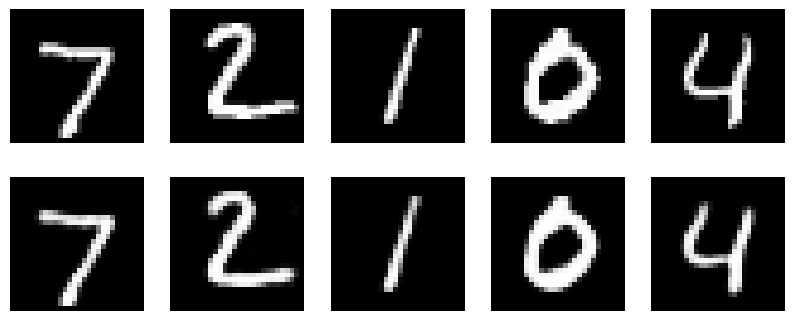

In [ ]:

# Modelo Autoencoder
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy')

# Entrenar el autoencoder
autoencoder.fit(x_train, x_train, epochs=20, batch_size=512, shuffle=True, validation_data=(x_test, x_test))

# Evaluación y visualización de reconstrucciones
n = 5
samples = x_test[:n]
reconstructions = autoencoder.predict(samples)

fig, axes = plt.subplots(2, n, figsize=(10, 4))
for i in range(n):
    # Imagen original
    axes[0, i].imshow(samples[i].squeeze(), cmap='gray')
    axes[0, i].axis('off')
    # Imagen reconstruida
    axes[1, i].imshow(reconstructions[i].squeeze(), cmap='gray')
    axes[1, i].axis('off')
plt.show()
